# Training an intents classification model

Define constants

In [1]:
from os import getcwd, path
import matplotlib.pyplot as plt
import numpy as np

BASE_PATH = getcwd()

DATA_UTILS = path.join(BASE_PATH, 'common/data_utils.py')
TRAIN_UTILS = path.join(BASE_PATH, 'convnet/train.py')
TRAIN_PATH = path.join(BASE_PATH, 'kc_data.json')
CLASSES_FILE = path.join(BASE_PATH, 'classes.json')

In [2]:
# exec(open(GLOVE_UTILS).read())
# print_top_similar('hello', count=10)
exec(open(DATA_UTILS).read())
exec(open(TRAIN_UTILS).read())

Use functions from the utils to extract and preprocess the training data
Refer to `kc_data.json` for the sample data format
`get_data_pairs` is then used to parse data into a tuple of `([list_of_sentences], [list_of_labels])`

In [3]:
X_data, y_data = get_data_pairs(data_from_json(TRAIN_PATH))

classes = list(set(y_data))
num_classes = len(classes)

X_train = X_data
y_train = np.array([
    classes.index(item)
    for item in y_data
], dtype='float32')

Plot the training data

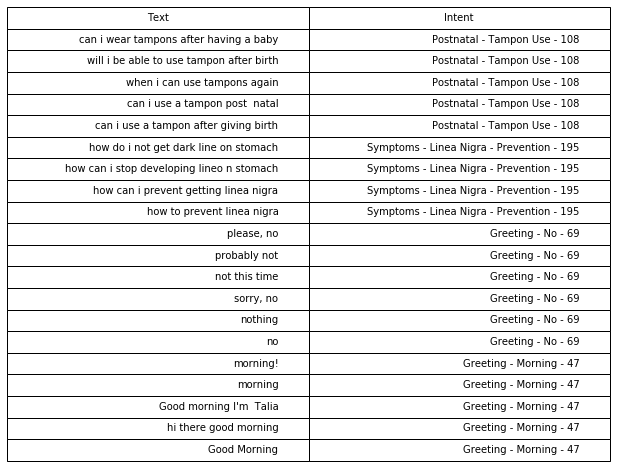

In [4]:
cell_text = [
    [item, y_data[idx] + ' - ' + str(int(y_train[idx]))] 
    for (idx, item) in enumerate(X_train)
]
plt.table(cellText=cell_text[:20],
          colLabels=['Text', 'Intent'],
          loc='center') \
   .scale(1.8,1.8)
plt.axis('off')
plt.show()

In [5]:
print('Number of samples: %s, classes: %s' % (len(X_train), num_classes))

Number of samples: 10256, classes: 1427


Save the classes descriptions as json

In [ ]:
import json

with open(CLASSES_FILE, 'w') as classes_file:
    json.dump(classes, classes_file)

Start training using the ConvNet model and save

In [ ]:
training_data = [(item, y_train[idx]) for idx, item in enumerate(X_train)]

model = trainIters(training_data, classes, n_iters=50, log_every=5, verbose=1)

Importing /Users/2359media/Documents/botbot-nlp/data/glove/glove.6B.300d.pickle...
12m 26s (- 112m 0s) (5 10%) 1889.8644 - acurracy: 0.3135
24m 26s (- 97m 45s) (10 20%) 696.8988 - acurracy: 0.6113
36m 38s (- 85m 30s) (15 30%) 338.5105 - acurracy: 0.7502
49m 1s (- 73m 32s) (20 40%) 231.5332 - acurracy: 0.8037
61m 31s (- 61m 31s) (25 50%) 191.2145 - acurracy: 0.8405
74m 8s (- 49m 25s) (30 60%) 174.8037 - acurracy: 0.8570
86m 54s (- 37m 14s) (35 70%) 162.1355 - acurracy: 0.8681
100m 12s (- 25m 3s) (40 80%) 151.6184 - acurracy: 0.8746
120m 23s (- 13m 22s) (45 90%) 142.2031 - acurracy: 0.8770


Evaluate model recall & precision @k=1

In [ ]:
result = model(Variable(prepare_vec_sequence(wordpunct_tokenize('No'), word_to_vec, SENTENCE_DIM, to_variable=False).unsqueeze(0)))
print(classes[argmax(result)])

Evaluate model recall & precision @k=3

model.test(TEMP_PATH, k=3)

Evaluate model recall & precision @k=5

model.test(TEMP_PATH, k=5)